## Computer Vision basics with OpenCV & Python

### 1. Image processing and analysis

In [1]:
# အရင်ဆုံး အင်တာနက်က ပုံတစ်ပုံကို ‌‌ဒေါင်းလုတ်ဆွဲဖို့ urllib ကို import လုပ်ပါမယ်
import urllib.request

# ဒီမှာတော့ နေကြာပန်းပုံလေးယူထားပါတယ်
img_url = 'https://gilmour.com/wp-content/uploads/2018/03/growing-sunflowers.jpg'
img_name = 'sumflowers.jpg'

# Urllib ကိုသုံးပြီး ပုံကို‌ဒေါင်းလုတ်ဆွဲလိုက်ပါမယ်
urllib.request.urlretrieve(img_url, img_name)

('sumflowers.jpg', <http.client.HTTPMessage at 0x1e78aa8f190>)

### Image processing using OpenCV

OpenCV ကိုသုံးပြီး ပုံကိုဖတ်တာ၊ အရောင်ပြောင်းတာ၊ edge detection လုပ်တာတွေ အရင်လုပ်ပါမယ်

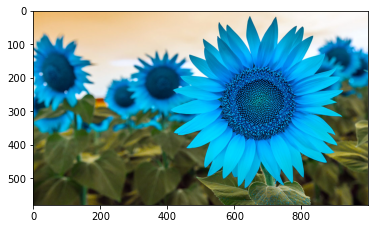

In [2]:
# ပုံကိုဖတ်ဖို့နဲ့ ကြည့်ဖို့အတွက် opencv နဲ့ matplotlib ကို import လုပ်ပါမယ် 
import cv2
import matplotlib.pyplot as plt

# OpenCV ကိုသုံးပြီး ပုံကိုဖတ်ပါမယ်
my_img = cv2.imread(img_name)

# Matplotlib ကိုသုံးပြီး ပုံကိုကြည့်ပါမယ်
plt.imshow(my_img)

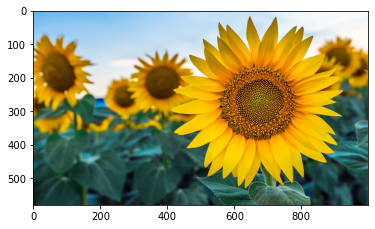

In [3]:
# ပုံကအပြာ‌ရောင်သန်းနေပါမယ်
# ဆိုတော့ opencv ကိုသုံးပြီး rgb format ကိုပြောင်းရပါမယ်
rgb_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)

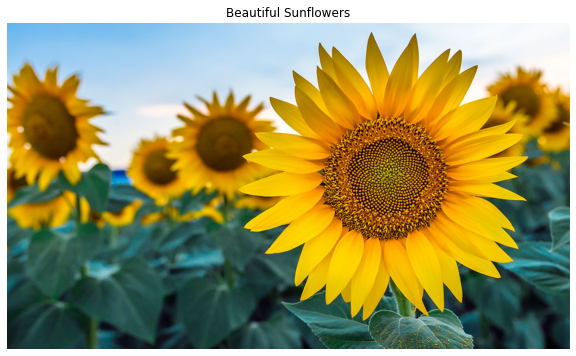

In [4]:
# ပုံရဲ့အရွယ်အစားကို ပြောင်းလဲချင်ရင် rcParams ကိုသုံးပြီး ပြောင်းလို့ရပါတယ်
from pylab import rcParams
rcParams['figure.figsize'] = 12, 6

# ပုံမှာခေါင်းစဉ်ထည့်ချင်ရင် 
plt.title('Beautiful Sunflowers')

# ၀င်ရိုးတွေဖြောက်ချင်ရင်
plt.axis('off')
plt.imshow(rgb_img)

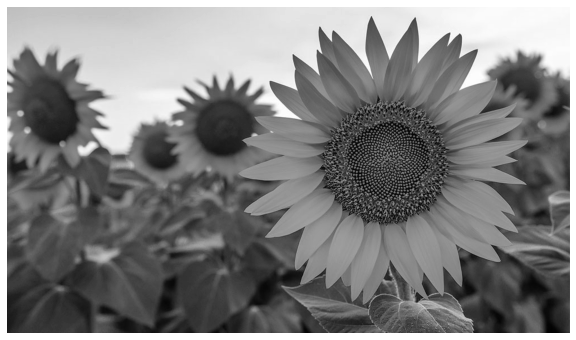

In [5]:
# RGB format ကနေ grayscale ကိုပြောင်းချင်ရင်
gray_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2GRAY)
plt.axis('off')

# ဒီနေရာမှာ cmap='gray' ဆိုတာကို ထည့်ပေးရပါတယ်
# မထည့်လည်း error တက်မှာမဟုတ်ပေမယ့် grayscale အဖြစ်မြင်ရမှာ မဟုတ်ပါဘူး
plt.imshow(gray_img, cmap='gray')

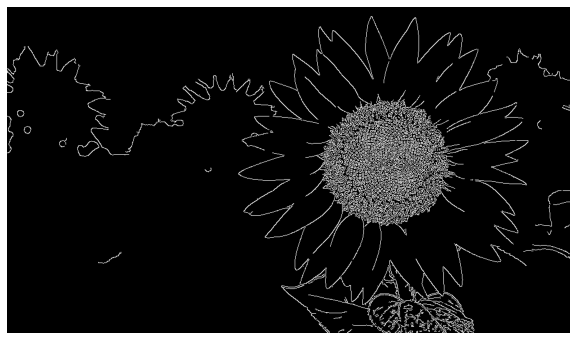

In [6]:
# ပုံကို edge detection လုပ်ချင်ရင်
edge_img = cv2.Canny(gray_img, threshold1=100, threshold2=200)
# Canny ဆိုတာက ဒီ edge detection algorithm ကို တီထွင်ခဲ့တဲ့သူရဲ့ နာမည် Jhon F. Canny ကနေယူထားတာပါ

plt.axis('off')
plt.imshow(edge_img, cmap='gray')

### Image analyzing using Histogram

Histogram ဆိုတာက ပုံမှာပါတဲ့ pixel တွေရဲ့တန်ဖိုးကိုပြတဲ့ဇယားပါ..
Grayscale ပုံတွေမှာဆိုရင် pixel တွေရဲ့ အနက်‌ရောင်နဲ့ အဖြူရောင် တန်ဖိုးကို ပြပေးတာပေါ့..
Pixel တွေရဲ့ တန်ဖိုးက 0(အနက်ရောင်) ကနေ 255(အဖြူရောင်) ထိရှိတယ်..
RGB ပုံတွေမှာဆိုရင်တော့ pixel တွေရဲ့  အနီ၊ အစိမ်း၊ အပြာ တန်ဖိုးကိုပြပေးတယ်..

Pixel တွေရဲ့ တန်ဖိုးကို ဘာလို့သိဖို့လိုလဲဆိုရင် ပုံက expoure များနေလား၊ နည်းနေလားသိအောင်လို့..
တနည်းအားဖြင့် ပုံကအရမ်းလင်းနေလား၊ အရမ်းမှောင်နေလား သိအောင်လို့ပါ..

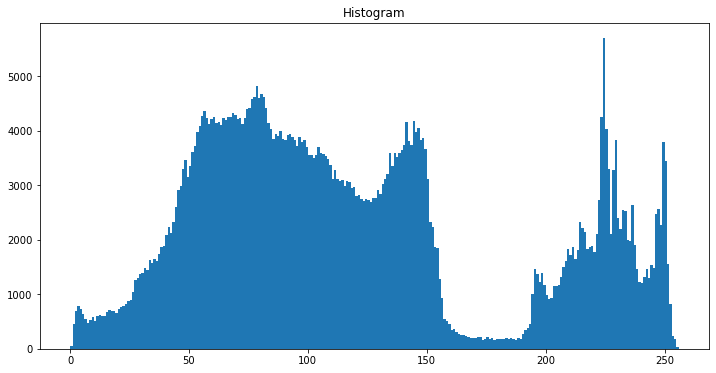

In [7]:
# Grayscale ပုံကို analyze လုပ်ချင်ရင်
plt.hist(gray_img.ravel(), 256, [0, 256])
plt.title('Histogram')
plt.show()

ဒီပုံမှာဆိုရင် pixel တန်ဖိုး 50 ၀န်းကျင်ကနေ 150 ၀န်းကျင်အတွင်းမှာ pixel တွေအများကြီးရှိနေတယ်..
ဆိုတော့ ပုံက အနက်ဖက်ကို ပိုသွားတယ်ဆိုတဲ့ သဘောပါပဲ..
ကိန်းဂဏာန်းတွေအရ ပြောရမယ်ဆိုရင်တော့ ကို 0-50 ကိုအနက်ရောင်၊ 50-100 ကိုအနက်နု‌ရောင်၊ 100-150 ကိုမီးခိုးရောင်၊ 150-200 ကိုအဖြူနု‌ရောင်၊ 200-255 ကိုအဖြူရောင်ပေါ့.. ဒါက‌ယေဘူယျသဘောပြောပြတာပါ..

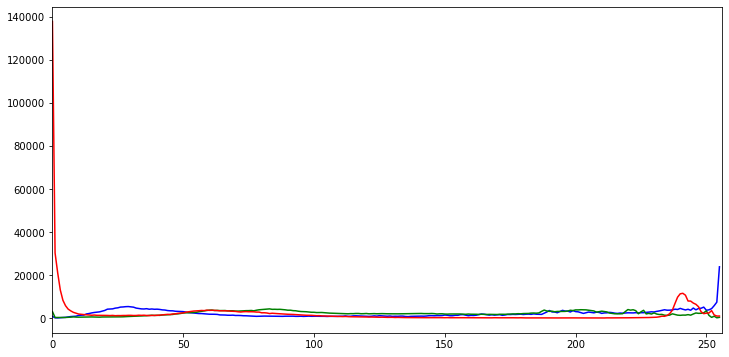

In [8]:
# RGB ပုံကို analyze လုပ်ချင်ရင်
color = ('b', 'g', 'r')
for i,col in enumerate(color):
    hist = cv2.calcHist([rgb_img], [i], None, [256], [0, 256])
    plt.plot(hist, color = col)
    plt.xlim([0, 256])
plt.show()

ဒါကတော့ RGB ပုံမှာပါတဲ့ pixel တွေရဲ့ RGB တန်ဖိုးတွေကို ပြထားတာပါ..